In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [7]:
def add_age(x):
    if pd.isnull(x[0]):
        if x[1]==1:
            return 37
        elif x[1]==2:
            return 28
        else :
            return 24
        
    else:
        return x[0]
            

In [9]:
df['Age']=df[['Age','Pclass']].apply(add_age,axis=1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [11]:
from sklearn.preprocessing import LabelEncoder
sex=LabelEncoder()
df['Sex']=sex.fit_transform(df['Sex'])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,1,22.0,7.2500
1,2,1,1,0,38.0,71.2833
2,3,1,3,0,26.0,7.9250
3,4,1,1,0,35.0,53.1000
4,5,0,3,1,35.0,8.0500


<AxesSubplot:>

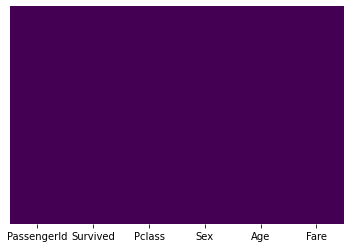

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [25]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [26]:
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [27]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [28]:
model.fit(X,Y)

DecisionTreeClassifier()

In [29]:
model.score(X,Y)

0.9775533108866442

In [33]:
model.predict([[3,1,35,8.050]])

array([0])